# ___Sentiment/Text Classification - Restaurant Reviews___

## ___Dataload___

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', sep = '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
dataset.shape

(1000, 2)

In [4]:
dataset.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [5]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

## ___Text Cleaning___

In [6]:
import re
import string

def text_cleaner(text):
  '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub("\\W"," ",text) # remove special chars
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  
  return text

In [7]:
dataset['Review']=dataset['Review'].apply(text_cleaner)

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def stemmer(text):
  ps = PorterStemmer()
  text = ' '.join([ps.stem(word) for word in word_tokenize(text) if word not in set(stopwords.words('english'))])
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
dataset['Review']=dataset['Review'].apply(stemmer)

In [10]:
dataset.head()

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


## ___Bag of Words___

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating the Bag of Words model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(dataset['Review']).todense()
y = dataset.iloc[:, 1].values

## ___Modelling___

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 1500)
(800,)
(200, 1500)
(200,)


### ___Support Vector Machines___

In [13]:
#Support Vector Machine
from sklearn.svm import SVC

SVC_classifier = SVC(kernel = 'rbf')
SVC_classifier.fit(X_train, y_train)
y_pred_SVC = SVC_classifier.predict(X_test)

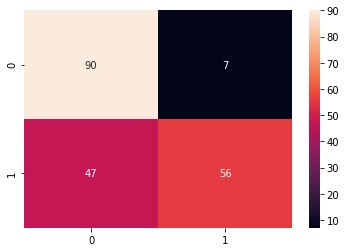

In [14]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_SVC), range(2),
                  range(2))
sns.heatmap(df_cm, annot=True)

In [15]:
accuracy_score(y_test,y_pred_SVC)

0.73

### ___Naive Bayes___

In [16]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
#predicitng the Test set results
y_pred_gb = classifier.predict(X_test)

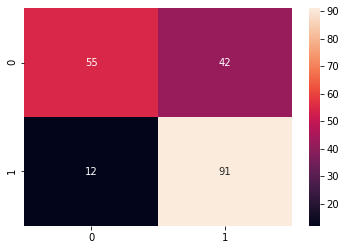

In [18]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_gb), range(2),
                  range(2))
sns.heatmap(df_cm, annot=True)

In [19]:
accuracy_score(y_test, y_pred_gb)

0.73

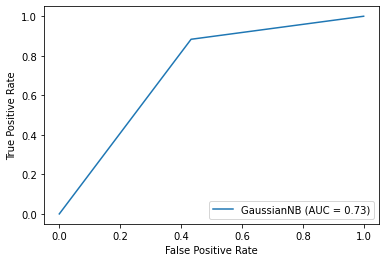

In [20]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(classifier, X_test, y_test);

In [25]:
from sklearn.metrics import classification_report

classification_report(y_test, y_pred_gb)

'              precision    recall  f1-score   support\n\n           0       0.82      0.57      0.67        97\n           1       0.68      0.88      0.77       103\n\n    accuracy                           0.73       200\n   macro avg       0.75      0.73      0.72       200\nweighted avg       0.75      0.73      0.72       200\n'

### ___Random Forest___

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred_rf)

0.73

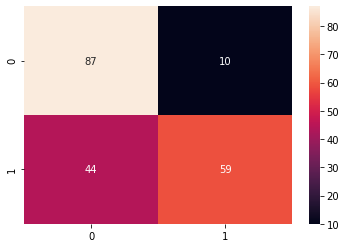

In [23]:
df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred_rf), range(2),
                  range(2))
sns.heatmap(df_cm, annot=True)

### ___Prediction___

In [24]:
feedback = ""
newReview = "The food was Amazing"

def predict(new_review):   
        new_review = text_cleaner(new_review)
        new_review = stemmer(new_review)
        print(new_review)
        new_review = cv.transform([new_review]).toarray()   

        if classifier.predict(new_review)[0] == 1:
            return "Positive"   
        else:       
            return "Negative"
feedback = predict(newReview)

print("This review is: ", feedback) 

food amaz
This review is:  Positive
